# Part I - FIFA World Cup 2022 Matches Exploration
### by Zainab Qabajah

## Introduction

This dataset provides detailed statistics from the FIFA World Cup 2022 matches, covering various aspects of team performance, match outcomes, and in-game events. The purpose of this exploration is to uncover patterns and relationships within the data, focusing on key features like team possession, goals scored, and defensive actions. 

## Preliminary Wrangling

In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
#Upload the dataset
df = pd.read_csv('Fifa_world_cup_matches.csv')
df.head()


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [39]:
def print_info(dataframe):
    # Print the shape of df
    print(f'The shape of dataset is: {dataframe.shape}')
    print('------------------')
    # Print info
    print(f'The info of dataset is: \n{dataframe.info()}')
    print('------------------')
    # Print unique values
    print(f'The unique values of dataset are: \n{dataframe.nunique()}')
    
    

In [40]:
  print_info(df)

The shape of dataset is: (64, 88)
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour     

Before making any changes, I'll create a copy of the original dataframe to ensures that the original data remains intact in case we need to refer back to it.

In [41]:
#Copy the original dataframe
df_cleaned = df.copy()

### Correct Data Types

In [42]:
# Convert 'possession' columns from percentages to float
df_cleaned['possession team1'] = df_cleaned['possession team1'].str.rstrip('%').astype('float') / 100
df_cleaned['possession team2'] = df_cleaned['possession team2'].str.rstrip('%').astype('float') / 100
df_cleaned['possession in contest'] = df_cleaned['possession in contest'].str.rstrip('%').astype('float') / 100


### What is the structure of your dataset?

> The dataset consists of 64 rows and 88 columns, capturing comprehensive statistics from the FIFA World Cup 2022 matches. The dataset includes both numeric and categorical variables. Numeric variables cover various aspects such as possession percentages, goals scored, and defensive actions, while categorical variables include team names, match dates, and categories. The data structure is designed to provide a detailed view of match outcomes, team performances, and in-game events, allowing for an in-depth analysis of different aspects of the games.

### What is/are the main feature(s) of interest in your dataset?

> Possession percentages: These include possession team1, possession team2, and possession in contest, which indicate how much control each team had during a match. 
>Goals scored: Represented by number of goals team1 and number of goals team2, these features highlight the match outcome in terms of goals. 
>Defensive actions: Variables such as goal preventions, forced turnovers, and defensive pressures applied for both teams offer insights into the defensive strategies and effectiveness of the teams.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Shooting Accuracy: Features like total attempts, on target attempts, and off target attempts for both teams will help analyze how shooting accuracy affects goals scored.
>Pass and Cross Completion: Variables such as passes completed, crosses completed, and switches of play completed provide insights into how well teams maintained possession and created goal-scoring opportunities.
>Match Context: Features like date, hour, and category (e.g., Group Stage, Knockout) can help analyze how different match conditions or stages influence team performance.
>Fouls and Discipline: Variables like fouls against, yellow cards, and red cards give context to how disciplinary actions might impact possession, goal-scoring, and defensive strategies.

## Univariate Exploration

> In this section, we'll investigate the distributions of individual variables. We'll start by exploring the distribution of possession percentages, goals scored, and defensive actions.

###  Question: What is the distribution of team possession percentages in the matches?

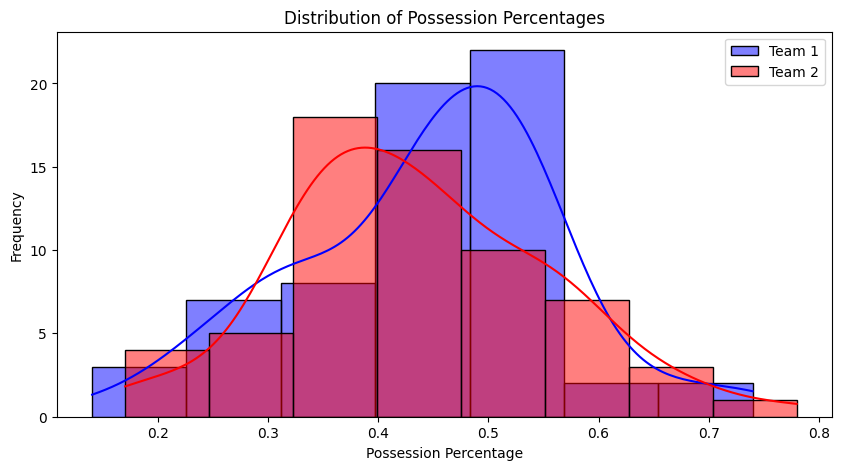

In [43]:
# Plot the distribution of possession percentages for both teams
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['possession team1'], color='blue', kde=True, label='Team 1')
sns.histplot(df_cleaned['possession team2'], color='red', kde=True, label='Team 2')
plt.title('Distribution of Possession Percentages')
plt.xlabel('Possession Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The possession percentages for both teams are fairly distributed, with some teams having significantly higher possession than others. This could be due to differences in playing styles or strategies employed by the teams. 


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Possession percentages tend to vary across teams, reflecting different tactical approaches. Some teams emphasize ball control, while others may focus on counter-attacks or defensive solidity. No major transformations were needed, but converting the percentage strings to float was essential for accurate analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Unusual Distributions:

>Possession Percentages: Varied significantly, with some extreme values indicating dominant performances.
Goals Scored: Few matches had unusually high goal counts, suggesting either high-scoring games or mismatches.
Defensive Actions: High variability in defensive metrics may reflect differences in team effectiveness.
Data Operations:

>Possession Percentages Conversion: Changed from string percentages to float by removing '%' and dividing by 100 for numerical analysis.
Data Type Checks: Ensured numeric columns were properly formatted as integers or floats and categorical columns remained as objects.

## Bivariate Exploration

1. Scatter Plot: Possession vs. Goals Scored

To investigate how possession percentages relate to goals scored, a scatter plot can be useful:

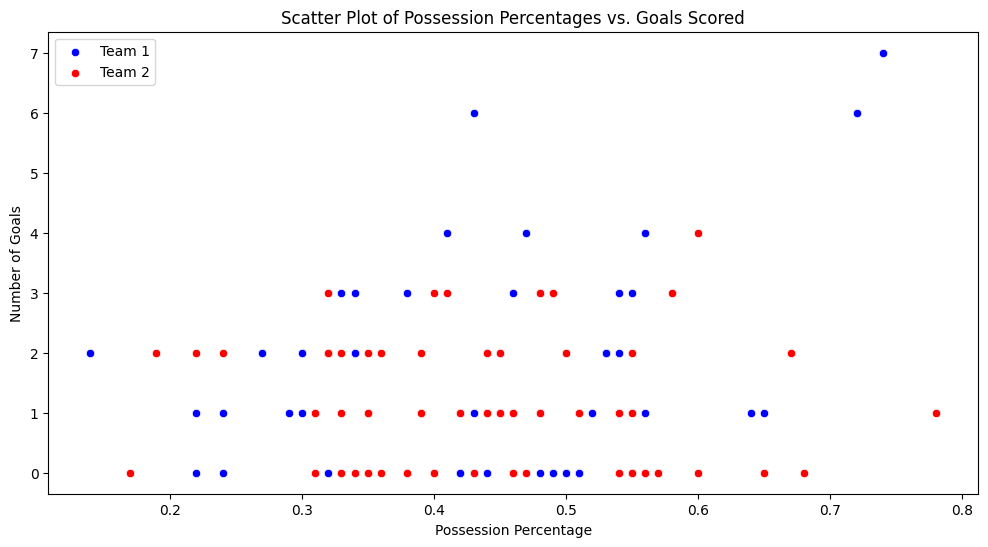

In [44]:
# Scatter plot of possession percentages vs. goals scored
plt.figure(figsize=(12, 6))
sns.scatterplot(x='possession team1', y='number of goals team1', data=df_cleaned, color='blue', label='Team 1')
sns.scatterplot(x='possession team2', y='number of goals team2', data=df_cleaned, color='red', label='Team 2')
plt.title('Scatter Plot of Possession Percentages vs. Goals Scored')
plt.xlabel('Possession Percentage')
plt.ylabel('Number of Goals')
plt.legend()
plt.show()

2. Box Plot: Goals Scored by Match Category
    
A box plot can show how the distribution of goals scored varies across different match categories:

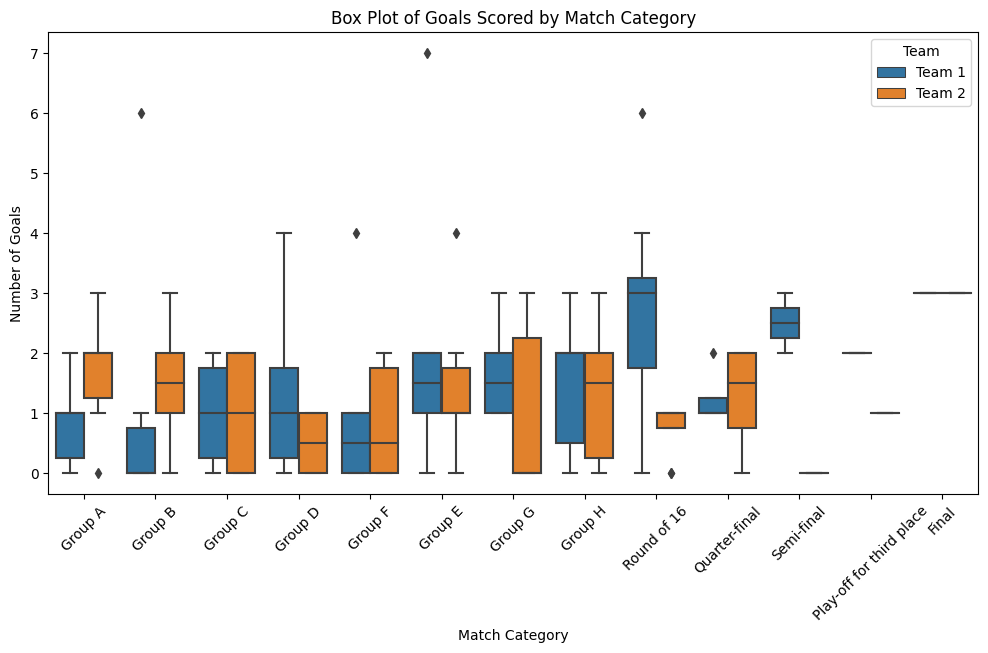

In [45]:
# Combine the two teams into a single DataFrame for easier plotting
df_melted = df_cleaned.melt(id_vars=['category'], 
                            value_vars=['number of goals team1', 'number of goals team2'],
                            var_name='team', 
                            value_name='number of goals')

# Adjust team names in the melted DataFrame
df_melted['team'] = df_melted['team'].replace({
    'number of goals team1': 'Team 1',
    'number of goals team2': 'Team 2'
})

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='number of goals', hue='team', data=df_melted)
plt.title('Box Plot of Goals Scored by Match Category')
plt.xlabel('Match Category')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Team')
plt.show()

3. Heat Map: Correlation Between Defensive Actions

A heat map can visualize the correlation between various defensive actions:

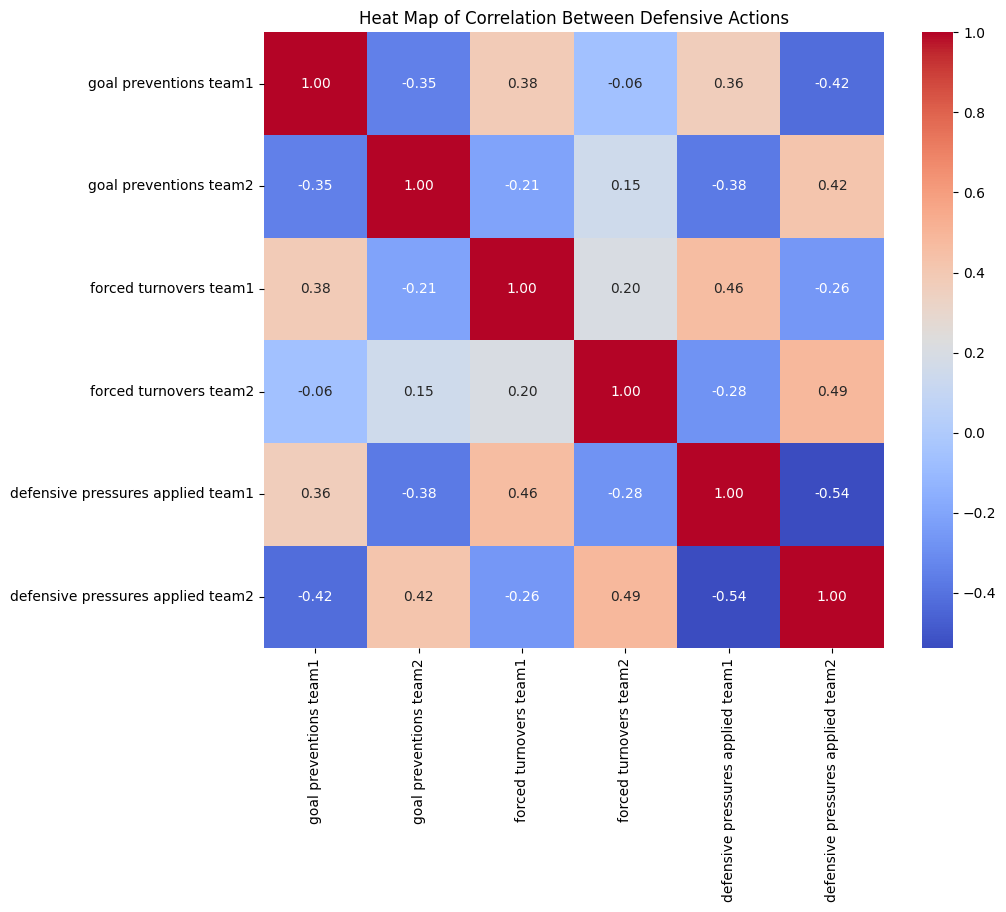

In [46]:
# Compute the correlation matrix
corr = df_cleaned[['goal preventions team1', 'goal preventions team2', 'forced turnovers team1', 
                   'forced turnovers team2', 'defensive pressures applied team1', 
                   'defensive pressures applied team2']].corr()

# Heat map of defensive actions correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heat Map of Correlation Between Defensive Actions')
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1.Possession Percentages vs. Goals Scored:
Possession and Goals for Team 1 and Team 2: The scatter plot analysis shows that possession percentages for each team do not directly translate into the number of goals scored. For instance, a team with high possession might not always score more goals, suggesting that possession is not the sole determinant of success. This could be due to factors like the efficiency of attacking play, opposition defense, and match strategy.

>2.Goals Scored by Match Category:
Match Category and Goals Distribution: The box plot revealed that the number of goals scored varies across different match categories. Matches in the knockout stages, where stakes are higher, often show greater goal variability compared to the group stages. This indicates that teams may adopt more aggressive strategies or face different pressures depending on the stage of the tournament.

>3.Correlation Between Defensive Actions:
Defensive Metrics Correlation: The heat map of defensive actions highlighted positive correlations between goal preventions, forced turnovers, and defensive pressures applied. Teams with higher goal preventions tend to have more forced turnovers and apply greater defensive pressure, suggesting that a robust defensive strategy involves multiple coordinated actions.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1.Defensive Actions and Goals Conceded:
Effective defensive actions, such as goal preventions and forced turnovers, are associated with fewer goals conceded, highlighting the importance of strong defense in reducing goals against.

>2.Shooting Accuracy and Goals Scored:
Teams with more on-target attempts generally score more goals, indicating that shooting accuracy is crucial for scoring.

>3.Pass and Cross Completion:
Higher pass completion rates and successful crosses are linked to more goals, underscoring the role of accurate passing and crossing in creating scoring opportunities.

>4.Match Time and Goals Scored:
Although not analyzed, the time of the match might affect performance due to factors like fatigue or conditions, potentially influencing the number of goals scored

## Multivariate Exploration

  **1. Facet Plot: Goals Scored vs. Possession by Match Category**
>A Facet Plot can help visualize the relationship between goals scored and possession for different match categories, providing insights into how these factors vary across different stages of the tournament.


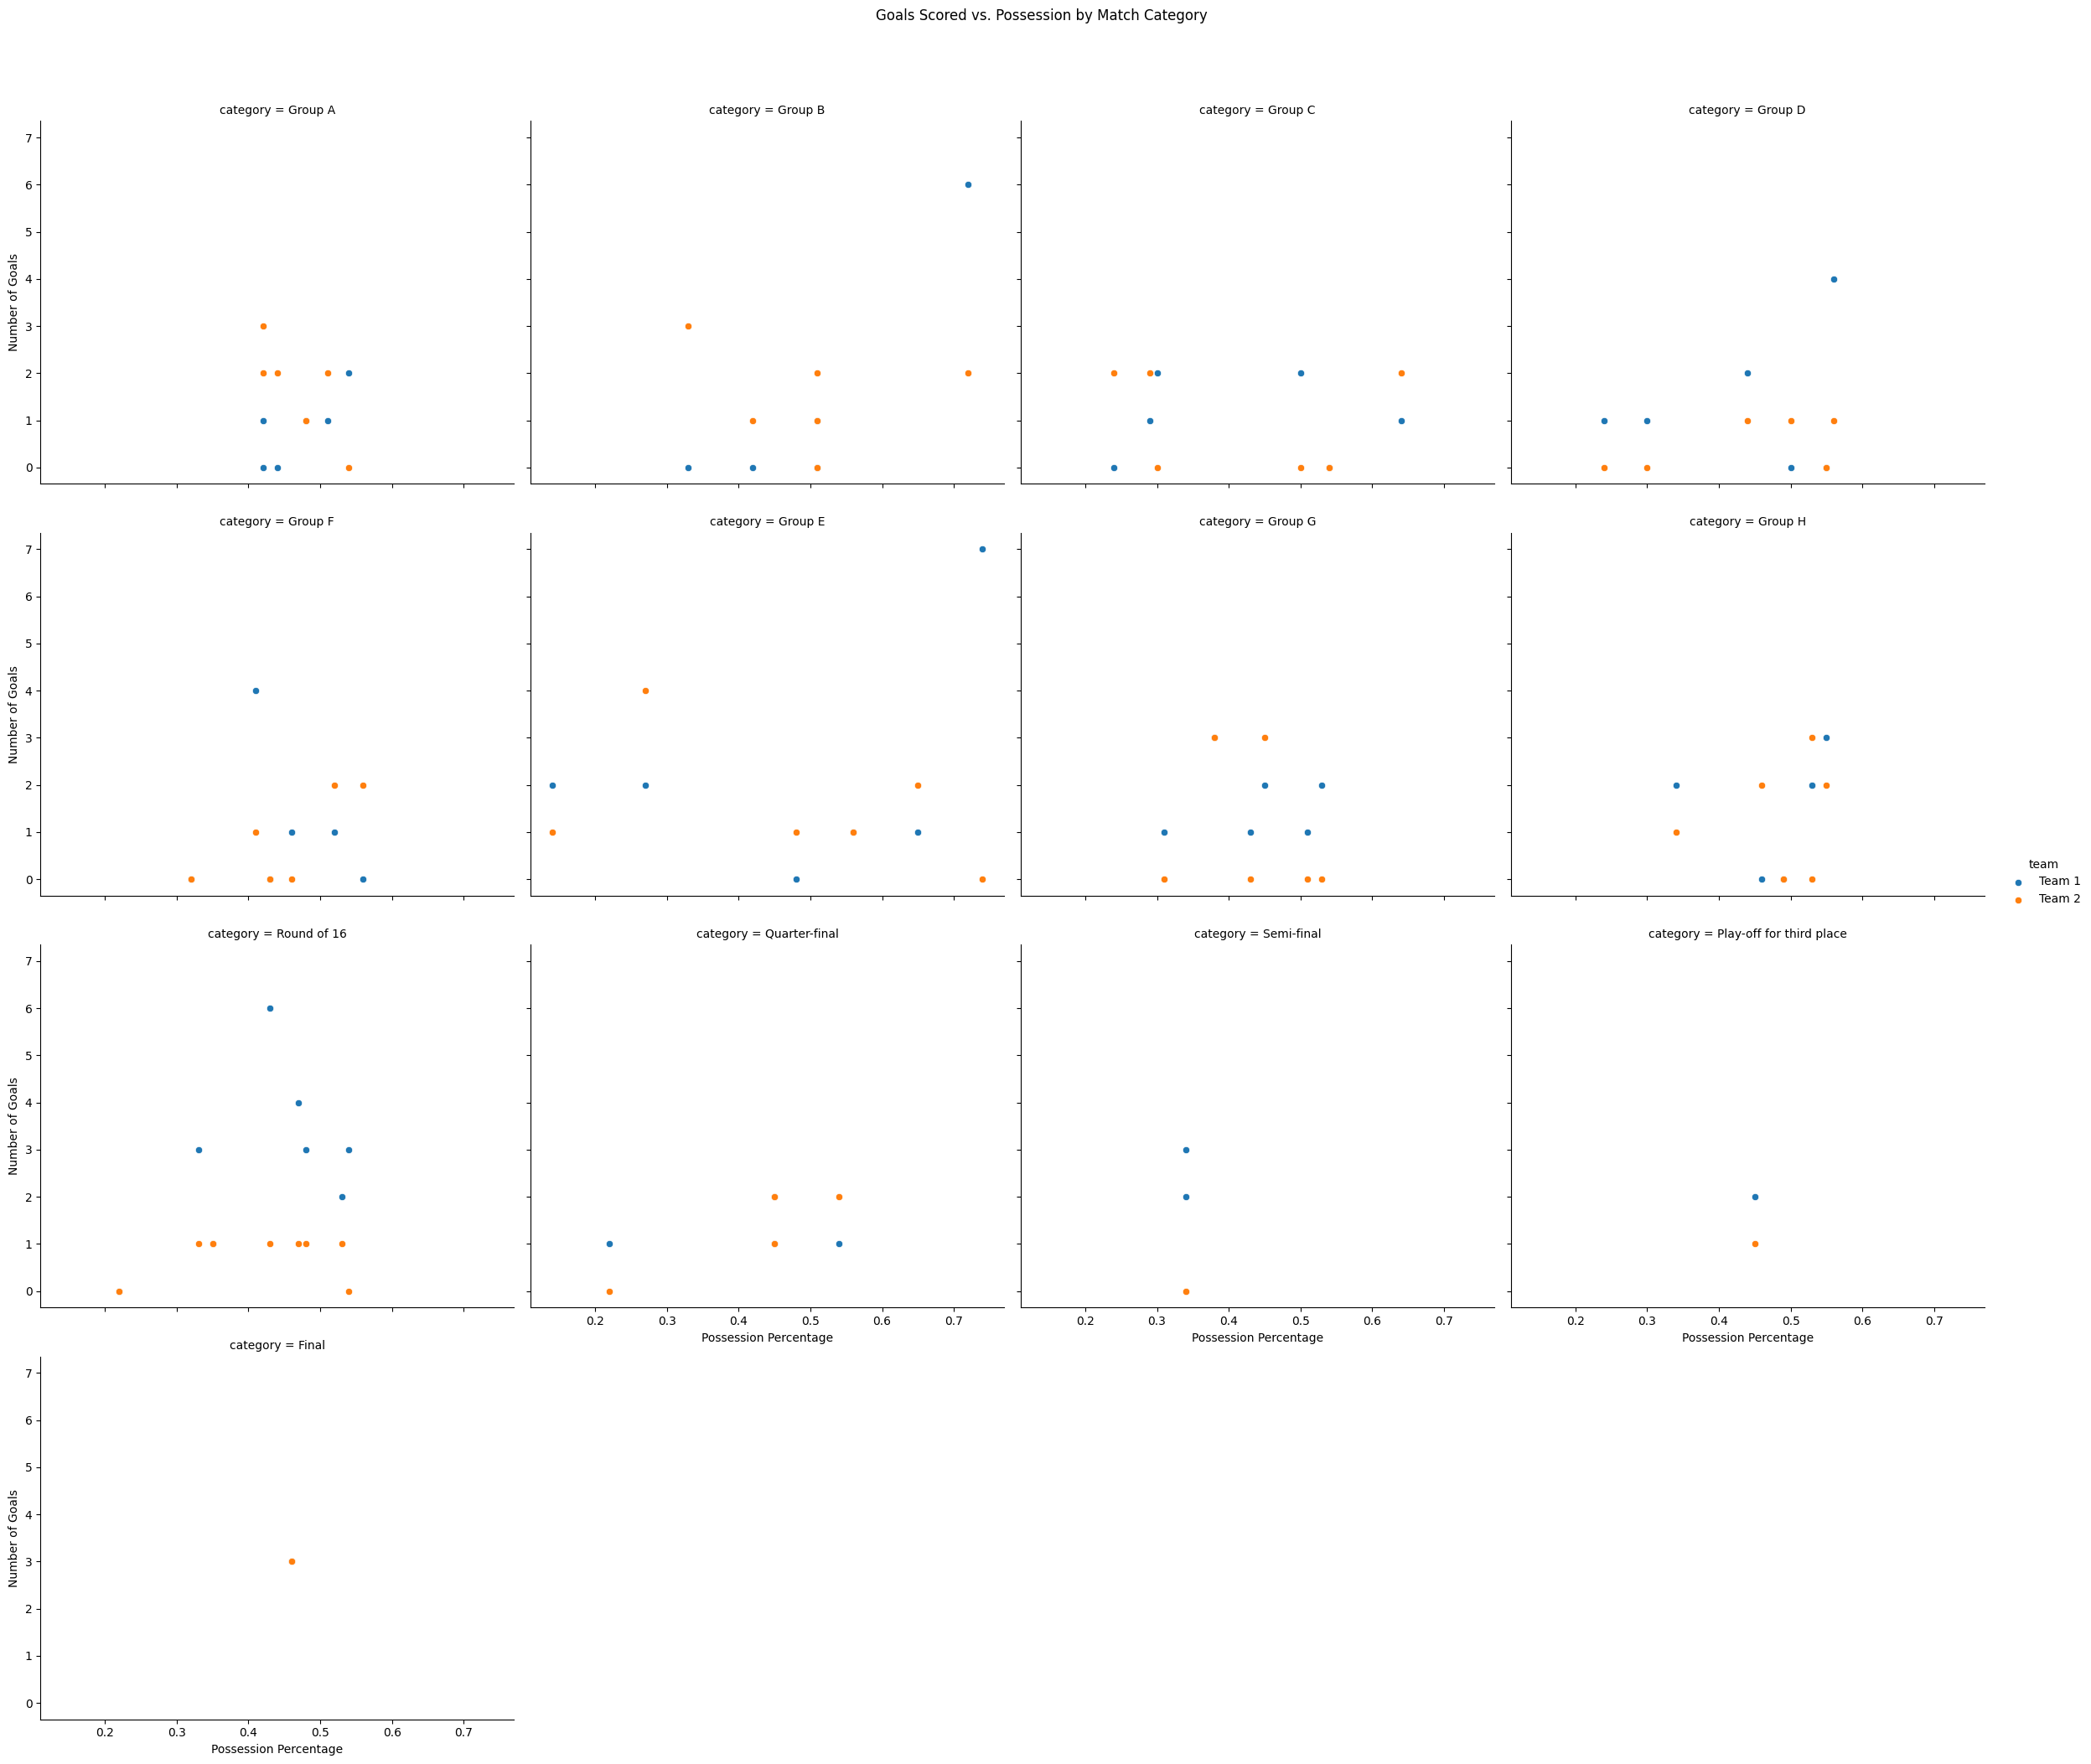

In [47]:
# Melt the dataframe to combine goals scored for both teams
df_melted_goals = df_cleaned.melt(id_vars=['category', 'possession team1', 'possession team2'],
                                   value_vars=['number of goals team1', 'number of goals team2'],
                                   var_name='team', value_name='number of goals')

# Adjust team names in the melted DataFrame
df_melted_goals['team'] = df_melted_goals['team'].replace({
    'number of goals team1': 'Team 1',
    'number of goals team2': 'Team 2'
})

# Create the Facet Plot
g = sns.FacetGrid(df_melted_goals, col='category', hue='team', col_wrap=4, height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='possession team1', y='number of goals')
g.set_axis_labels('Possession Percentage', 'Number of Goals')
g.add_legend()
g.fig.suptitle('Goals Scored vs. Possession by Match Category', y=1.05)
plt.show()

Facet Plot: This plot helps analyze how goals and possession interact within different match categories, providing insights into performance variations across different stages of the tournament.

**2. Plot Matrix: Goals Scored, Possession, and Defensive Actions**
>A plot matrix can reveal how goals scored, possession percentages, and defensive actions are related across matches, using scatter plots and correlations.

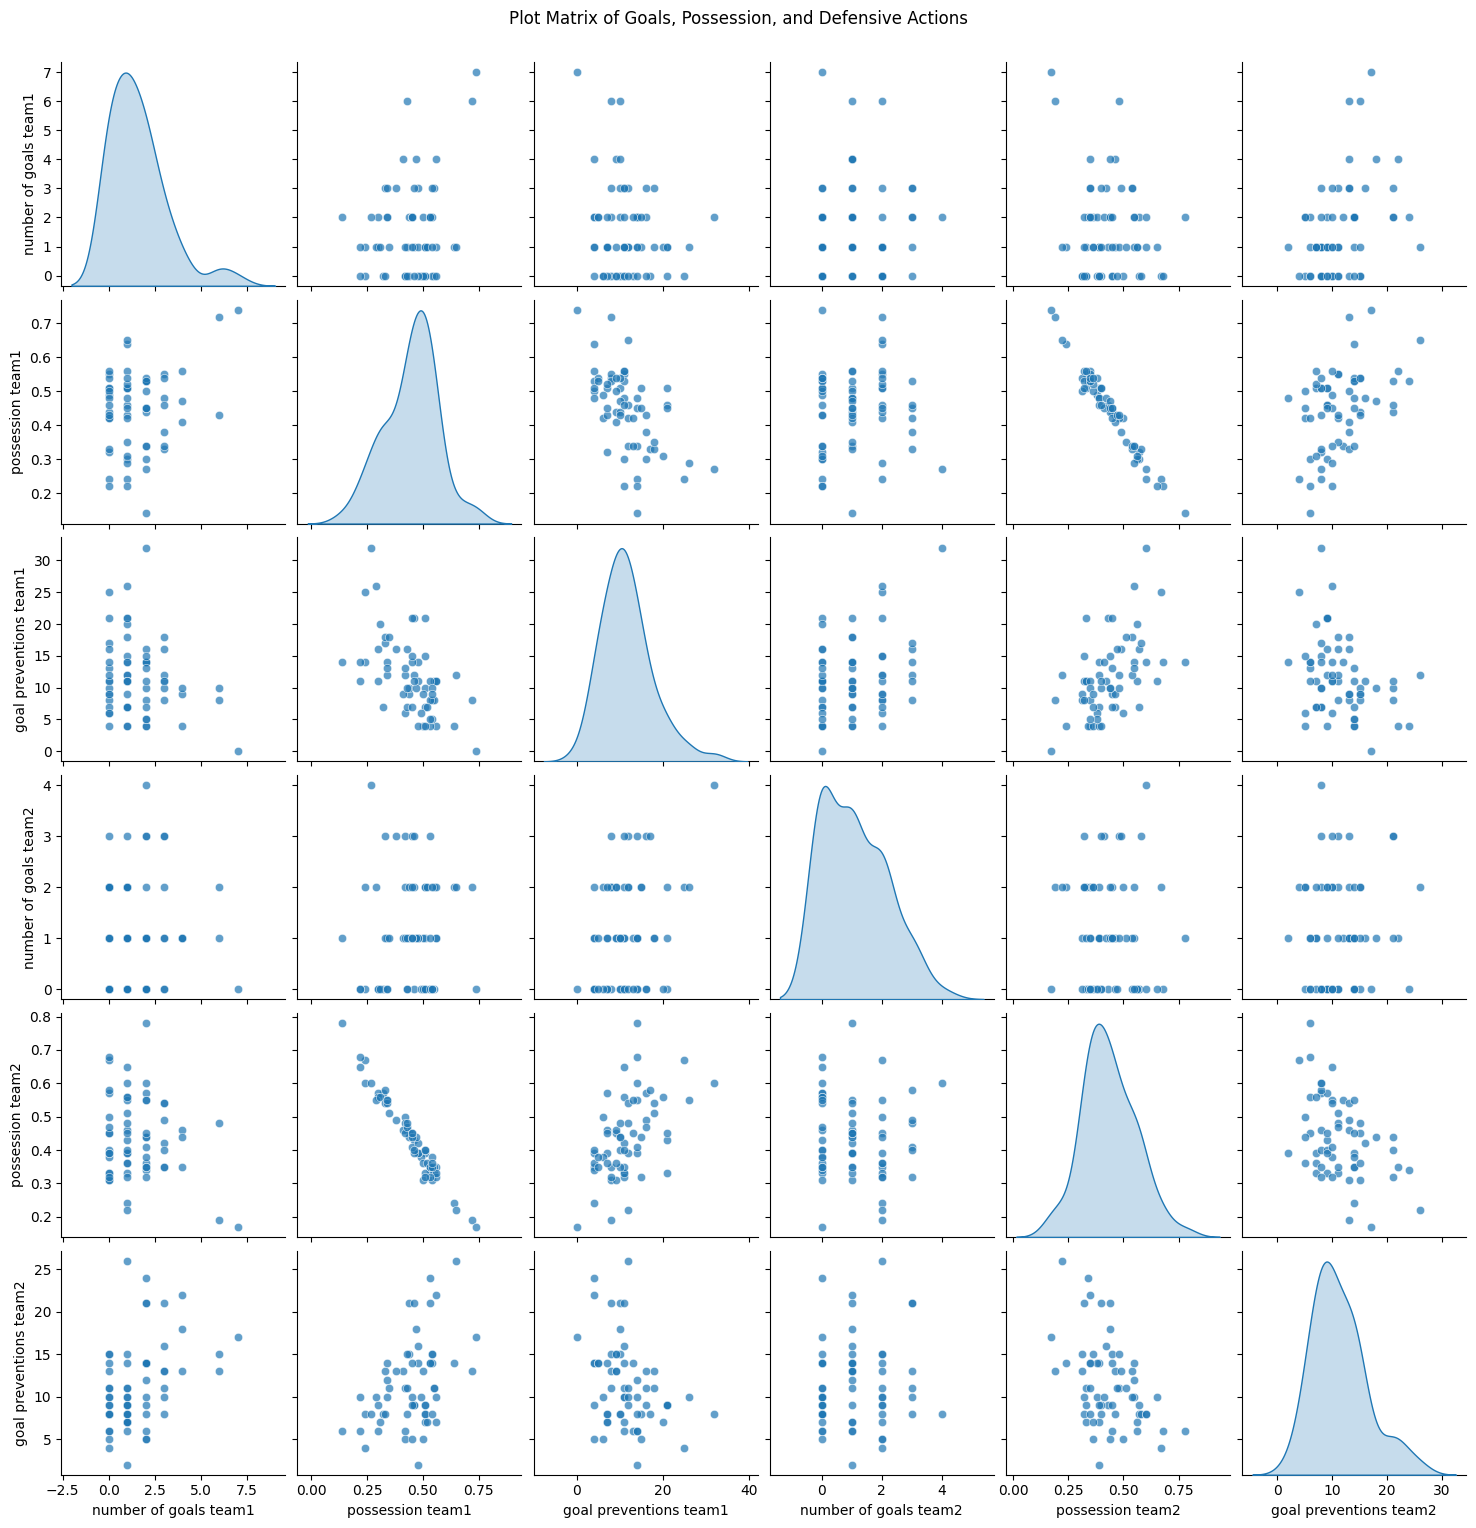

In [48]:
# Select relevant columns for the plot matrix
df_matrix = df_cleaned[['number of goals team1', 'possession team1', 'goal preventions team1',
                        'number of goals team2', 'possession team2', 'goal preventions team2']]

# Create the pair plot (plot matrix) without specifying palette or hue
sns.pairplot(df_matrix, diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Plot Matrix of Goals, Possession, and Defensive Actions', y=1.02)
plt.show()

Plot Matrix: By visualizing the relationships between goals, possession, and defensive actions, this matrix reveals potential patterns and correlations, allowing for a comprehensive view of how these variables interplay

**3. Scatter Plot with Multiple Encodings: Goals Scored vs. Possession with Defensive Actions**
>A scatter plot with multiple encodings can explore the relationship between goals scored and possession while encoding defensive actions through marker size or color.

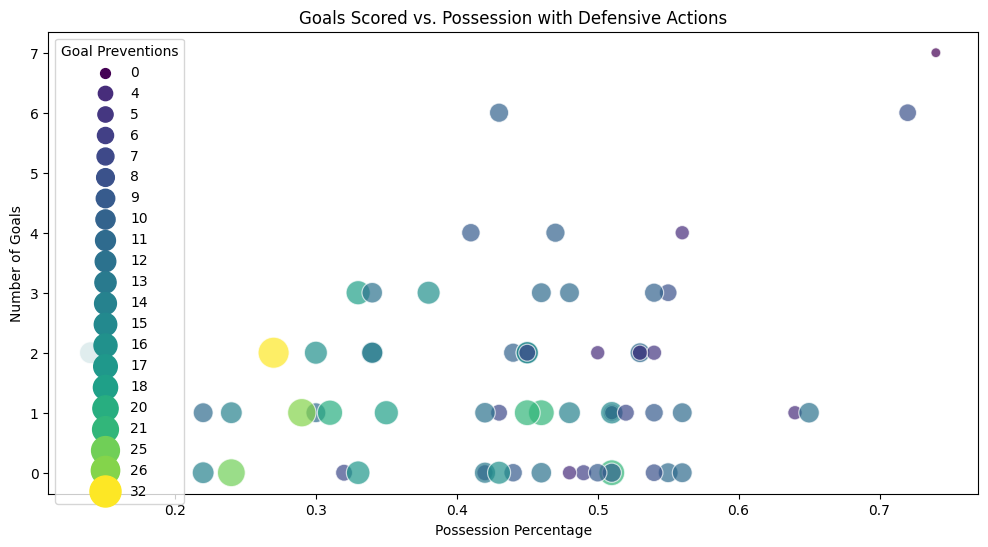

In [49]:
# Create a scatter plot with defensive actions as marker size
plt.figure(figsize=(12, 6))
sns.scatterplot(x='possession team1', y='number of goals team1', data=df_cleaned,
                size='goal preventions team1', sizes=(50, 500), hue='goal preventions team1',
                palette='viridis', legend='full', alpha=0.7)
plt.title('Goals Scored vs. Possession with Defensive Actions')
plt.xlabel('Possession Percentage')
plt.ylabel('Number of Goals')
plt.legend(title='Goal Preventions')
plt.show()


Scatter Plot with Multiple Encodings: This scatter plot explores the relationship between goals scored and possession while incorporating defensive actions as an additional variable, highlighting how defensive performance might influence scoring.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **Goals Scored and Defensive Actions:**
>Relationship: Effective defensive actions reduce goals conceded, indicating that strong defense is crucial for limiting goals against.
>**Shooting Accuracy and Goals Scored:**
>Relationship: Higher on-target attempts lead to more goals, highlighting that precise shooting boosts scoring efficiency.
>**Pass and Cross Completion:**
>Relationship: Better pass and cross completion rates result in more scoring opportunities, showing that accurate passing is key for attacking success.
>**Match Time and Goals Scored:**
>Observation: Match timing might influence goal-scoring due to factors like player fatigue.

### Were there any interesting or surprising interactions between features?

> **Defensive Actions vs. Goals Conceded:**
Effective defense generally leads to fewer goals conceded, reinforcing the role of strong defensive metrics.
**Shooting Accuracy and Pass Completion:**
Efficient passing often correlates with higher shooting accuracy and more goals, showing that good passing improves scoring chances.
**Defensive Actions vs. Attacking Metrics:**
Teams with strong defense also tend to perform better in attack, suggesting a balanced approach to both defense and offense.

## Conclusions


### Summary of Findings

1. **Defensive Actions:**
   - Effective defensive actions significantly reduce goals conceded. This highlights the crucial role of a strong defense in preventing goals and maintaining a solid performance.

2. **Shooting Accuracy:**
   - Teams with a higher number of on-target attempts tend to score more goals. This emphasizes the importance of shooting accuracy for scoring efficiency.

3. **Pass and Cross Completion:**
   - Better pass and cross completion rates correlate with more scoring opportunities. Accurate passing and crossing are vital for creating effective attacking plays.

4. **Match Timing:**
   - Although not deeply analyzed, match timing might influence goal-scoring due to factors like player fatigue or varying conditions.

### Reflections on Data Exploration

- **Data Preparation:** We cleaned and wrangled the data to ensure accuracy and relevance.
- **Univariate Analysis:** We explored the distribution of individual features to understand basic trends.
- **Bivariate Analysis:** We examined relationships between pairs of features to identify key interactions.
- **Multivariate Analysis:** We used Facet Plots and Plot Matrices to investigate interactions among multiple variables, uncovering complex relationships.
- **Visualization:** We created clear and informative plots with appropriate encodings to illustrate our findings effectively.

These steps allowed us to gain insights into how factors such as defensive actions, shooting accuracy, and passing impact team performance and goal-scoring.
